In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#export
from exp.nb_00 import TEST
import operator

def test(a,b,cmp,cname:str=None)->None:
    """Compare two objects
    input:
        a: any datatype
        b: any datatype
        cmp: compare function
        cname: function objective
    return:
        bool
    """
    if cname is None: cname=cmp.__name__
    assert cmp(a,b),f"{cname}:\n{a}\n{b}"

def test_eq(a,b): test(a,b,operator.eq,"==")

In [3]:
#export
from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor

MNIST_URL='http://deeplearning.net/data/mnist/mnist.pkl'

In [4]:
path = datasets.download_data(MNIST_URL, ext='.gz'); path

PosixPath('/home/sankarshan/.fastai/data/mnist.pkl.gz')

In [7]:
with gzip.open(path, 'rb') as fin:
    ((x_train, y_train), (x_valid, y_valid), (x_test, y_test)) = pickle.load(fin, encoding='latin-1')

In [10]:
x_train, y_train, x_valid, y_valid = map(tensor, (x_train, y_train, x_valid, y_valid))

In [12]:
n, c = x_train.shape

In [21]:
assert n==y_train.shape[0]==50000, "not equal"
test_eq(c, 28*28)
test_eq(y_train.min(),0)
test_eq(y_train.max(),9)

In [22]:
mpl.rcParams['image.cmap'] = 'gray'

In [29]:
img = x_train[0]

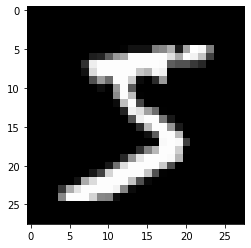

In [30]:
plt.imshow(img.view(28,28))

In [32]:
hid_dim = 10
input_dim = 28*28
weights = torch.randn(input_dim, hid_dim)
bias = torch.randn(hid_dim)

### Regular Matrix Multiplication 

In [43]:
def matmul(a:tensor, b:tensor)->tensor:
    ar, ac = a.shape
    br, bc = b.shape
    assert ac==br, "matrix not compatible for multiplication"
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac):
                c[i,j] += a[i,k]*b[k,j]
    return c

In [44]:
batch_sz = 5
x_bs = x_valid[:batch_sz]
wx = weights

In [45]:
x_bs.shape, wx.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [46]:
x_bs @ wx

tensor([[  4.0773, -13.9631,  -4.9552,   0.7365,  10.0741,  -2.2731,  -7.1410,
           1.0055,  -7.1140,   9.5109],
        [  9.7468,  -0.1593,   3.9856,  12.5191,   6.7423,  -2.6230,   8.7743,
          13.3184, -10.7539,   4.5080],
        [ -2.8468,  -4.4958,  -3.4377,  -0.6392,   4.9011,  -3.1716,  -8.8869,
           4.8426,  -3.3791, -10.3773],
        [ 18.5752,   3.9761,   6.9121,  10.2789,  10.1182,  -7.2873,  -1.7592,
          -0.0823, -11.3182, -15.8687],
        [ 12.5342,   2.8550,  14.1618,   8.8015,  -1.5894,   2.1763,   9.6472,
           9.8623,  11.0695, -13.5179]])

In [49]:
%time _=matmul(x_bs, wx)

CPU times: user 897 ms, sys: 0 ns, total: 897 ms
Wall time: 897 ms


In [38]:
t1.shape

torch.Size([5, 10])

In [53]:
def matmul(a:tensor, b:tensor)->tensor:
    ar, ac = a.shape
    br, bc = b.shape
    assert ac==br, "matrix not compatible for multiplication"
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            # for k in range(ac):
            c[i,j] = (a[i,:]*b[:,j]).sum()
    return c

In [55]:
%time _=matmul(x_bs, wx)

CPU times: user 3.1 ms, sys: 62 µs, total: 3.16 ms
Wall time: 2.65 ms


### If 2 tensors are close
$\lvert \text{a} - \text{b} \rvert \leq \texttt{atol} + \texttt{rtol} \times \lvert \text{b} \rvert$

In [60]:
#export
def near(a:tensor,b:tensor): return torch.allclose(a, b, rtol=1e-3, atol=1e-5)
def test_near(a:torch,b:torch): return test(a,b,near,"==")

In [62]:
test_near(x_bs @ wx, matmul(x_bs, wx))

In [85]:
def matmul(a:tensor, b:tensor)->tensor:
    ar, ac = a.shape
    br, bc = b.shape
    assert ac==br, "matrix not compatible for multiplication"
    c = torch.zeros(ar, bc)
    for i in range(ar):
        #         for j in range(bc):
        #             # for k in range(ac):
        c[i] = (a[i].unsqueeze(-1)*b).sum(dim=0)
    return c

In [88]:
%timeit -n 10 _=matmul(x_bs, wx)

455 µs ± 41.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [90]:
!python notebook2script.py 01_matmul.ipynb

Converted 01_matmul.ipynb to exp/nb_01.py
